In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
# 读取数据
df = pd.read_csv("/Users/shy/Downloads/chinahadoop-机器学习/SHY-Practise/data/cars.csv")
df

,Brand,Type,Color,Construction Year,Odometer,Ask Price,Days Until MOT,HP
0,Peugeot 106,1.0,blue,2002,166879,999,138,60
1,Peugeot 106,1.0,blue,1998,234484,999,346,60
2,Peugeot 106,1.1,black,1997,219752,500,-5,60
3,Peugeot 106,1.1,red,2001,223692,750,-87,60
4,Peugeot 106,1.1,grey,2002,120275,1650,356,59
5,Peugeot 106,1.1,red,2003,131358,1399,266,60
6,Peugeot 106,1.1,green,1999,304277,799,173,57
7,Peugeot 106,1.4,green,1998,93685,1300,0,75
8,Peugeot 106,1.1,white,2002,225935,950,113,60
9,Peugeot 106,1.4,green,1997,252319,650,133,75


做了特征的处理，把类别型特征转换成了独热编码的形式。
这里针对Color和Type做了独热编码操作。
而对于Brand没有做任何操作，因为在给定的数据里Brand都是一样的，可以去掉了。
可以看出来表格中多了几个列，分别以Color:和Type:开头，表示的就是转换成独热编码之后的结果。

In [17]:
# 特征处理
# 将颜色与类型编程独热编码
df_colors = pd.get_dummies(df['Color'], prefix='Color')
df_types = pd.get_dummies(df['Type'], prefix='Type')
# 添加独热编码数据列
df = pd.concat([df,df_colors,df_types], axis=1)
# 取出独热编码对应的原始列
df = df.drop(['Brand','Type','Color'], axis=1)
df

,Construction Year,Odometer,Ask Price,Days Until MOT,HP,Color: _black,Color: _blue,Color: _green,Color: _grey,Color: _red,...,Type_1.4,Color_black,Color_blue,Color_green,Color_grey,Color_red,Color_white,Type_1.0,Type_1.1,Type_1.4
0,2002,166879,999,138,60,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,1998,234484,999,346,60,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1997,219752,500,-5,60,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,2001,223692,750,-87,60,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
4,2002,120275,1650,356,59,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
5,2003,131358,1399,266,60,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
6,1999,304277,799,173,57,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
7,1998,93685,1300,0,75,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
8,2002,225935,950,113,60,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
9,1997,252319,650,133,75,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1


第一步先看一下数据特征之间的相关性，这里使用了corr()函数来计算特征之间的相关性。之后通通过sns模块来可视化相关性。 颜色越深的代表相关性越大。

Text(0.5, 1, 'Car Price Variables')

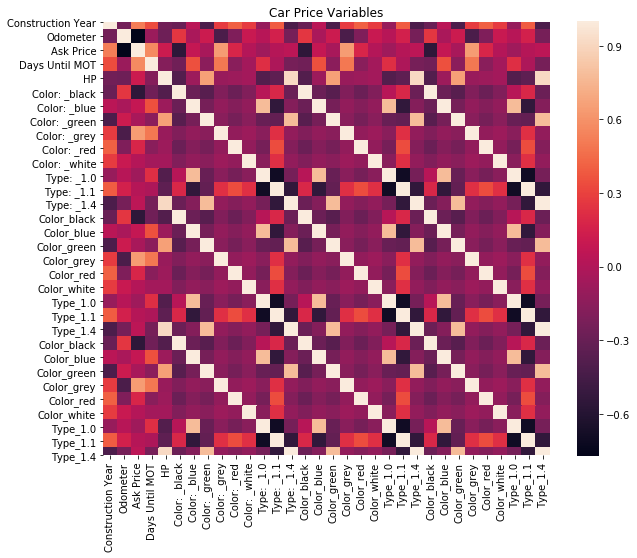

In [20]:
# 数据转换
matrix = df.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(matrix, square=True)
plt.title("Car Price Variables")

In [26]:
matrix

,Construction Year,Odometer,Ask Price,Days Until MOT,HP,Color: _black,Color: _blue,Color: _green,Color: _grey,Color: _red,...,Type_1.4,Color_black,Color_blue,Color_green,Color_grey,Color_red,Color_white,Type_1.0,Type_1.1,Type_1.4
Construction Year,1.000000,-0.246549,0.519944,0.336023,-0.258114,-0.292181,0.042312,-0.416692,0.276907,0.409019,...,-0.416071,-0.292181,0.042312,-0.416692,0.276907,0.409019,0.276907,-0.102663,0.397476,-0.416071
Odometer,-0.246549,1.000000,-0.772370,-0.087493,-0.272521,0.255838,-0.028979,0.115547,-0.422268,-0.200263,...,-0.233719,0.255838,-0.028979,0.115547,-0.422268,-0.200263,0.106843,0.023960,0.152580,-0.233719
Ask Price,0.519944,-0.772370,1.000000,0.566856,0.119583,-0.550887,0.081519,-0.037372,0.644913,0.182543,...,0.049406,-0.550887,0.081519,-0.037372,0.644913,0.182543,0.010801,-0.066592,0.021030,0.049406
Days Until MOT,0.336023,-0.087493,0.566856,1.000000,-0.178420,-0.263533,0.350928,-0.152912,0.496662,-0.161004,...,-0.238213,-0.263533,0.350928,-0.152912,0.496662,-0.161004,-0.055593,0.220799,-0.014554,-0.238213
HP,-0.258114,-0.272521,0.119583,-0.178420,1.000000,-0.385796,-0.081404,0.660070,-0.099888,-0.081404,...,0.910709,-0.385796,-0.081404,0.660070,-0.099888,-0.081404,-0.055111,-0.387764,-0.339586,0.910709
Color: _black,-0.292181,0.255838,-0.550887,-0.263533,-0.385796,1.000000,-0.284268,-0.365148,-0.192450,-0.284268,...,-0.284268,1.000000,-0.284268,-0.365148,-0.192450,-0.284268,-0.192450,0.030429,0.184466,-0.284268
Color: _blue,0.042312,-0.028979,0.081519,0.350928,-0.081404,-0.284268,1.000000,-0.233550,-0.123091,-0.181818,...,-0.181818,-0.284268,1.000000,-0.233550,-0.123091,-0.181818,-0.123091,0.778499,-0.539360,-0.181818
Color: _green,-0.416692,0.115547,-0.037372,-0.152912,0.660070,-0.365148,-0.233550,1.000000,-0.158114,-0.233550,...,0.778499,-0.365148,-0.233550,1.000000,-0.158114,-0.233550,-0.158114,-0.300000,-0.317543,0.778499
Color: _grey,0.276907,-0.422268,0.644913,0.496662,-0.099888,-0.192450,-0.123091,-0.158114,1.000000,-0.123091,...,-0.123091,-0.192450,-0.123091,-0.158114,1.000000,-0.123091,-0.083333,-0.158114,0.228218,-0.123091
Color: _red,0.409019,-0.200263,0.182543,-0.161004,-0.081404,-0.284268,-0.181818,-0.233550,-0.123091,1.000000,...,-0.181818,-0.284268,-0.181818,-0.233550,-0.123091,1.000000,-0.123091,-0.233550,0.337100,-0.181818


In [22]:
# 导入KNN相关的库以及其他相关的库。这里StandardScaler用来做特征的归一化，把原始特征转换成均值为0方差为1的高斯分布。
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

这部分代码主要用来做特征的归一化。这里需要注意的一点是特征的归一化的标准一定要来自于训练数据，之后再把它应用在测试数据上。因为实际情况下，测试数据是我们看不到的，也就是统计不到均值和方差。

In [35]:
X = df[['Construction Year', 'Odometer', 'Days Until MOT']]
y = df['Ask Price'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
X_normalizer = StandardScaler()
X_train = X_normalizer.fit_transform(X_train)
X_test = X_normalizer.transform(X_test)
y_normalizer = StandardScaler()
y_train = y_normalizer.fit_transform(y_train)
y_test = y_normalizer.transform(y_test)

这部分主要用来训练KNN模型，以及用KNN模型做预测，并把结果展示出来。这里我们使用了y_normalizer.inverse_transform，因为我们在训练的时候把预测值y也归一化了，所以最后的结论里把之前归一化的结果重新恢复到原始状态。 在结果图里，理想情况下，假如预测值和实际值一样的话，所有的点都会落在对角线上，但实际上现在有一些误差。

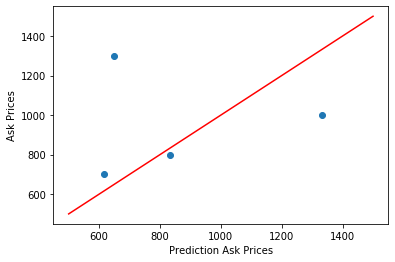

In [37]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train.ravel())
# predict prices
y_pred = knn.predict(X_test)
y_pred_inv = y_normalizer.inverse_transform(y_pred)
y_test_inv = y_normalizer.inverse_transform(y_test)
# Build a plot
plt.scatter(y_pred_inv, y_test_inv)
plt.xlabel('Prediction')
plt.ylabel('Real value')
# add a perfect prediction lion
diagnoal = np.linspace(500, 1500, 100)
plt.plot(diagnoal, diagnoal, '-r')
plt.xlabel('Prediction Ask Prices')
plt.ylabel('Ask Prices')
plt.show()

In [38]:
print(y_pred_inv)

[1333.          616.66666667  650.          833.        ]


In [39]:
knn

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')